In [1]:
# Predictive churn model 
# In this Notebook we are going to predict the chrun for the given data
# steps to follow:
# Data Validation
# Data Clean
# Data Exploration
# Finding Model for the Given features
# Training the Model
# Fine tunning the Model
# Model for Deployment

In [2]:
# importing the neccessary packages
import pandas as pd
import seaborn as sns

In [3]:
# installing the package for viewing the excel
!pip3 install openpyxl

  Using cached https://files.pythonhosted.org/packages/39/08/595298c9b7ced75e7d23be3e7596459980d63bc35112ca765ceccafbe9a4/openpyxl-3.0.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/96/c2/3dd434b0108730014f1b96fd286040dc3bcb70066346f7e01ec2ac95865f/et_xmlfile-1.1.0-py3-none-any.whl


In [4]:
# Opening the excel file with help of pandas and passing the engine argument to open the excel
dataframe = pd.read_excel('Churn.xlsx',engine='openpyxl')  

In [5]:
#Viewing the top 5 dataframe records
dataframe.head(5)  

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# checking is there any NaN values in the dataframe
dataframe.isna().sum()    

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
dataframe = dataframe.dropna(axis=0)
dataframe.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
dataframe = pd.get_dummies(data=dataframe,columns=['Churn','gender','Partner','Dependents','PhoneService','PaperlessBilling'],drop_first=True)

In [10]:
dataframe = dataframe.rename(columns={'Churn_Yes':'Churn','gender_Male':'gender','Partner_Yes':'Partner','Dependents_Yes':'Dependents','PhoneService_Yes':'PhoneService','PaperlessBilling_Yes':'PaperlessBilling'})

In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   tenure            7032 non-null   int64  
 3   MultipleLines     7032 non-null   object 
 4   InternetService   7032 non-null   object 
 5   OnlineSecurity    7032 non-null   object 
 6   OnlineBackup      7032 non-null   object 
 7   DeviceProtection  7032 non-null   object 
 8   TechSupport       7032 non-null   object 
 9   StreamingTV       7032 non-null   object 
 10  StreamingMovies   7032 non-null   object 
 11  Contract          7032 non-null   object 
 12  PaymentMethod     7032 non-null   object 
 13  MonthlyCharges    7032 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7032 non-null   uint8  
 16  gender            7032 non-null   uint8  


In [13]:
dataframe.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender,Partner,Dependents,PhoneService,PaperlessBilling
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785,0.504693,0.482509,0.298493,0.903299,0.592719
std,0.368844,24.545260,30.085974,2266.771362,0.441782,0.500014,0.499729,0.457629,0.295571,0.491363
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
dataframe.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'],
      dtype='object')

<AxesSubplot:xlabel='Churn', ylabel='count'>

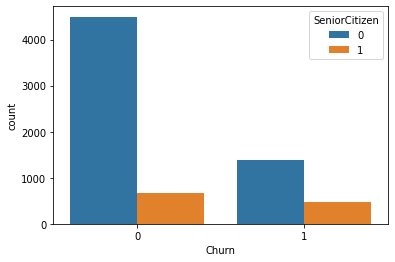

In [15]:
sns.countplot(x='Churn',hue='SeniorCitizen',data=dataframe)

In [16]:
numerical_df = dataframe[['SeniorCitizen','TotalCharges', 'Churn', 'gender',
       'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','MonthlyCharges']]

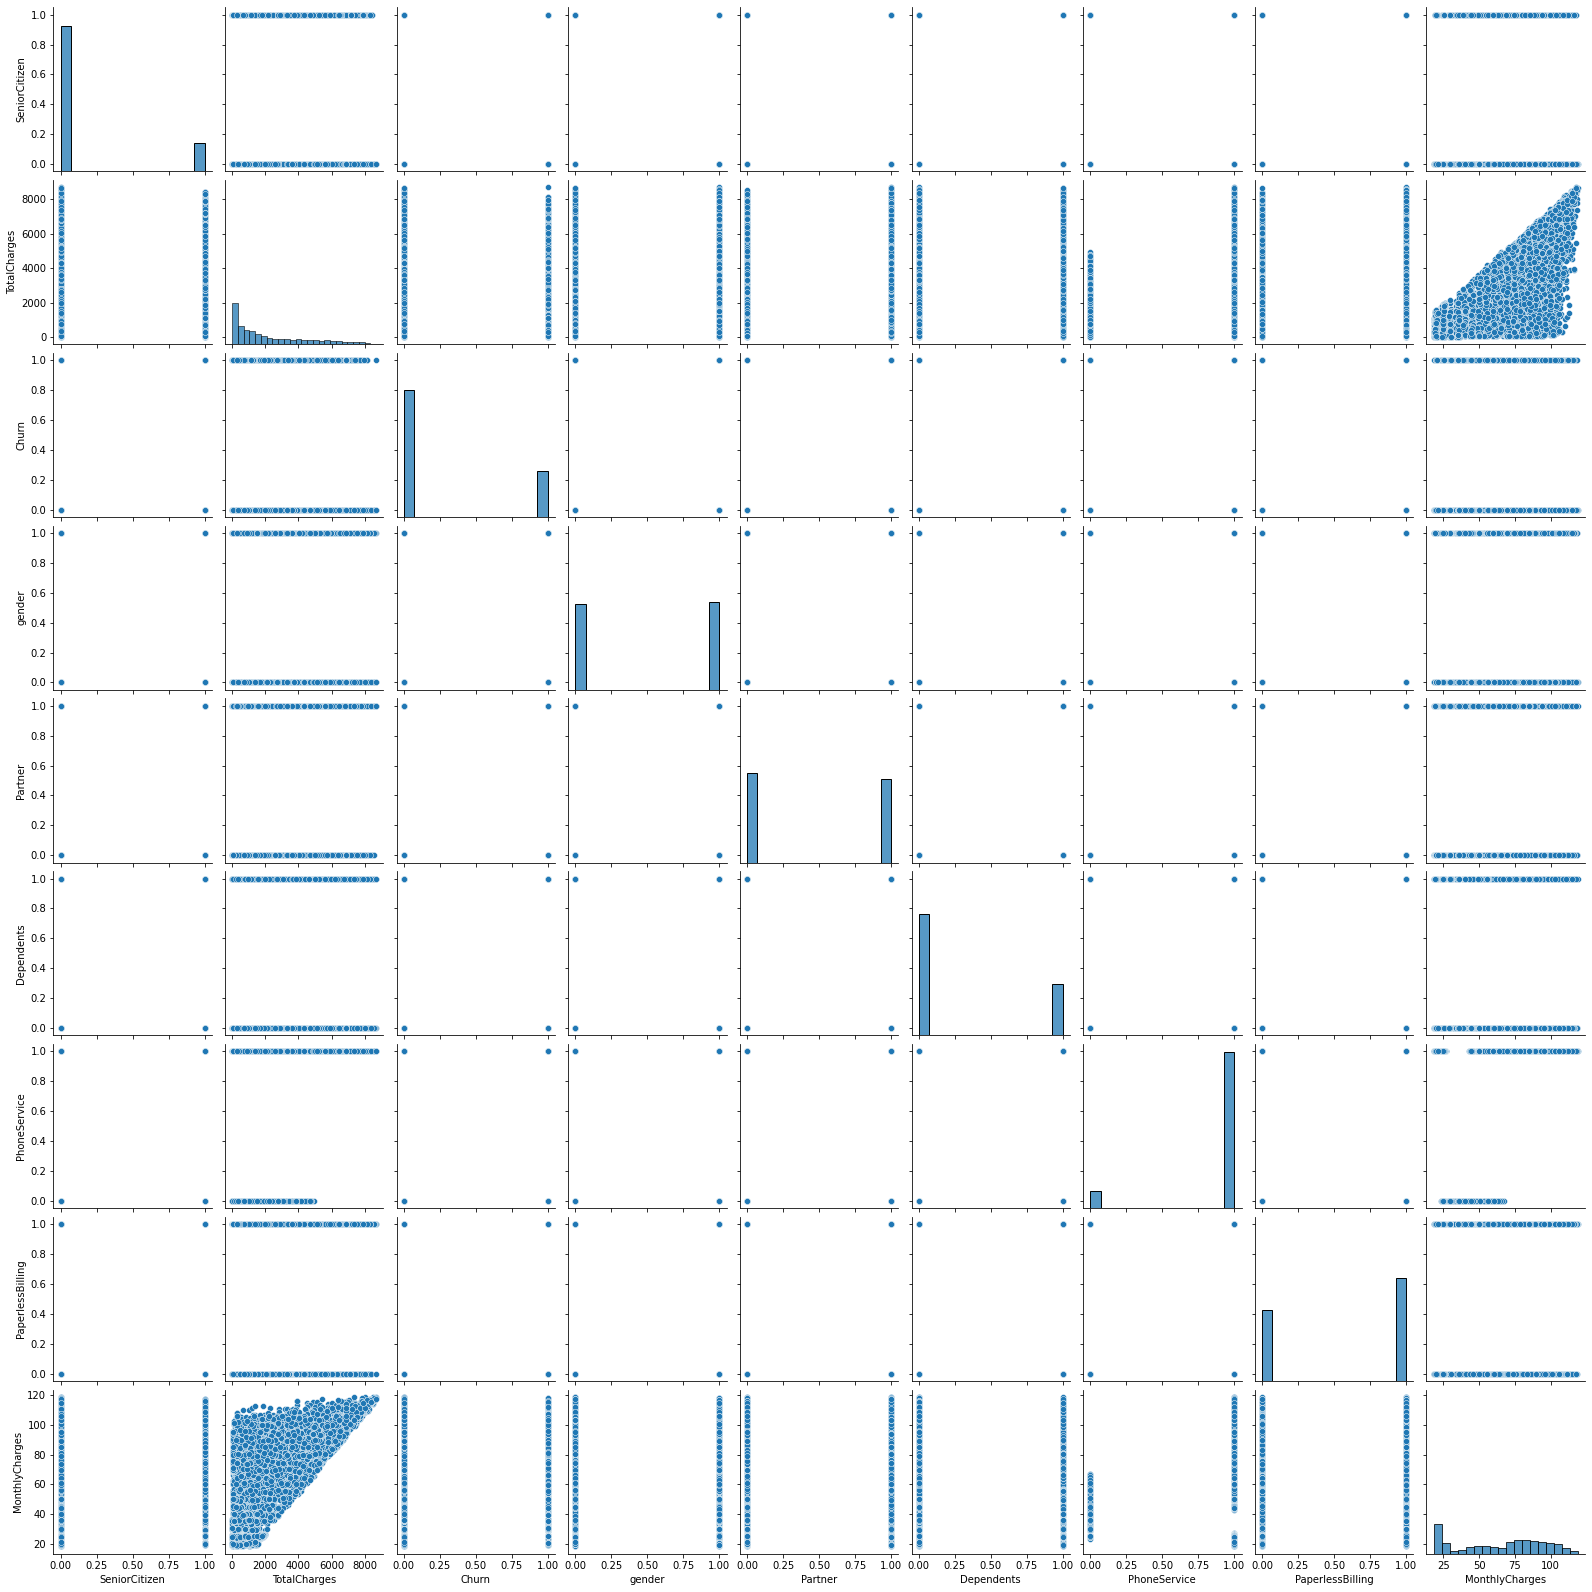

In [17]:
sns.pairplot(numerical_df)

In [18]:
dataframe.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [19]:
dataframe.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [20]:
dataframe.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dataframe['InternetService'] = label.fit_transform(dataframe['InternetService'])
dataframe['Contract'] = label.fit_transform(dataframe['Contract'])
dataframe['MultipleLines'] = label.fit_transform(dataframe['MultipleLines'])
dataframe['OnlineSecurity'] = label.fit_transform(dataframe['OnlineSecurity'])
dataframe['OnlineBackup'] = label.fit_transform(dataframe['OnlineBackup'])
dataframe['DeviceProtection'] = label.fit_transform(dataframe['DeviceProtection'])
dataframe['TechSupport'] = label.fit_transform(dataframe['TechSupport'])
dataframe['StreamingTV'] = label.fit_transform(dataframe['StreamingTV'])
dataframe['StreamingMovies'] = label.fit_transform(dataframe['StreamingMovies'])
dataframe['PaymentMethod'] = label.fit_transform(dataframe['PaymentMethod'])
dataframe['PaperlessBilling'] = label.fit_transform(dataframe['PaperlessBilling'])


In [22]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   tenure            7032 non-null   int64  
 3   MultipleLines     7032 non-null   int64  
 4   InternetService   7032 non-null   int64  
 5   OnlineSecurity    7032 non-null   int64  
 6   OnlineBackup      7032 non-null   int64  
 7   DeviceProtection  7032 non-null   int64  
 8   TechSupport       7032 non-null   int64  
 9   StreamingTV       7032 non-null   int64  
 10  StreamingMovies   7032 non-null   int64  
 11  Contract          7032 non-null   int64  
 12  PaymentMethod     7032 non-null   int64  
 13  MonthlyCharges    7032 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7032 non-null   uint8  
 16  gender            7032 non-null   uint8  


<AxesSubplot:xlabel='InternetService', ylabel='count'>

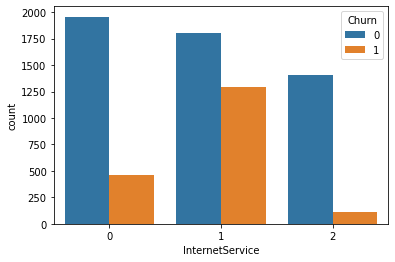

In [23]:
sns.countplot(x=dataframe['InternetService'],hue=dataframe['Churn'],data=dataframe)

In [24]:
numerical_df = dataframe.drop(columns='customerID')

In [25]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   tenure            7032 non-null   int64  
 2   MultipleLines     7032 non-null   int64  
 3   InternetService   7032 non-null   int64  
 4   OnlineSecurity    7032 non-null   int64  
 5   OnlineBackup      7032 non-null   int64  
 6   DeviceProtection  7032 non-null   int64  
 7   TechSupport       7032 non-null   int64  
 8   StreamingTV       7032 non-null   int64  
 9   StreamingMovies   7032 non-null   int64  
 10  Contract          7032 non-null   int64  
 11  PaymentMethod     7032 non-null   int64  
 12  MonthlyCharges    7032 non-null   float64
 13  TotalCharges      7032 non-null   float64
 14  Churn             7032 non-null   uint8  
 15  gender            7032 non-null   uint8  
 16  Partner           7032 non-null   uint8  


In [26]:
from sklearn.preprocessing import MaxAbsScaler
data = numerical_df.values
max_scaler = MaxAbsScaler()
normalized_data = max_scaler.fit_transform(data)
normalized_dataframe = pd.DataFrame(normalized_data,columns=numerical_df.columns)

In [27]:
normalized_dataframe.head(10)

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,Partner,Dependents,PhoneService,PaperlessBilling
0,0.0,0.013889,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.251368,0.003437,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.472222,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,1.000000,0.479579,0.217564,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.027778,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.453474,0.012453,1.0,1.0,0.0,0.0,1.0,1.0
3,0.0,0.625000,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.000000,0.356211,0.211951,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.027778,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.595368,0.017462,1.0,0.0,0.0,0.0,1.0,1.0
5,0.0,0.111111,1.0,0.5,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.666667,0.839158,0.094475,1.0,0.0,0.0,0.0,1.0,1.0
6,0.0,0.305556,1.0,0.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.750316,0.224461,0.0,1.0,0.0,1.0,1.0,1.0
7,0.0,0.138889,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.250526,0.034762,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.388889,1.0,0.5,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.666667,0.882526,0.350733,1.0,0.0,1.0,0.0,1.0,1.0
9,0.0,0.861111,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.472842,0.401615,0.0,1.0,0.0,1.0,1.0,0.0


In [28]:
# Finding the Machine Learning Model which will suit for our data!
# Hence most of the data is in Categorrical terms and its independent of the target variable we can go with Decision tree

In [29]:
# Below i had tried  Decision tress and Random Forest tree (Without Fine tunning)
# Decision tress with fine tuning and random forest tree with fine tuning

In [30]:
X = normalized_dataframe.drop(columns='Churn',axis=1)

In [31]:
y = normalized_dataframe['Churn']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [33]:
# Decision tree without fine tuning
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
predicted = dtree.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      1052
         1.0       0.45      0.49      0.47       355

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.73      0.72      0.72      1407



In [36]:
# Accuracy for Decession tree : 0.73

In [37]:
# Random forest tree without fine tuning
from sklearn.ensemble import RandomForestClassifier
random_tree = RandomForestClassifier()
random_tree.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
predicted_random = random_tree.predict(X_test)

In [39]:
print(classification_report(y_test,predicted_random))

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1052
         1.0       0.61      0.48      0.54       355

    accuracy                           0.79      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [40]:
# Accuracy for Random forest tree :0.79

In [41]:
# Model with fine tunning 
# Vizualizing the tree 
# Checking the model behaviour whether its overfiting or under fiting

In [42]:
# Descison tree vizulization

In [43]:
X_filter = normalized_dataframe.drop(columns=['Churn'],axis=1)

In [44]:
Xf_train,Xf_test,yf_train,yf_test = train_test_split(X_filter,y,test_size=0.2,random_state=101)

In [45]:
Xf_train

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,PaperlessBilling
850,0.0,0.027778,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,1.000000,0.209263,0.007139,1.0,0.0,0.0,1.0,0.0
2122,0.0,0.555556,0.5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.5,0.666667,0.356632,0.197638,1.0,1.0,0.0,0.0,1.0
596,0.0,0.055556,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.552000,0.027312,1.0,0.0,0.0,1.0,0.0
206,0.0,1.000000,0.5,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.333333,0.466947,0.481209,1.0,1.0,1.0,0.0,1.0
5006,1.0,0.986111,0.5,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.440421,0.433522,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0.0,0.222222,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.627789,0.134776,1.0,0.0,0.0,1.0,1.0
5695,0.0,0.263889,1.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.731368,0.180131,0.0,1.0,0.0,1.0,1.0
1361,0.0,0.138889,1.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.720842,0.093710,1.0,1.0,0.0,1.0,1.0
1547,0.0,0.430556,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.678316,0.284589,0.0,1.0,1.0,1.0,0.0


In [46]:
from sklearn.tree import DecisionTreeClassifier
de_tree_f = DecisionTreeClassifier(random_state=42)
de_tree_f.fit(Xf_train,yf_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [49]:
from sklearn.metrics import accuracy_score
train_pred=de_tree_f.predict(Xf_train)
accuracy_score(train_pred,yf_train)

0.9984

In [50]:
# Accuracy for training data = 0.9984

In [51]:
validation = de_tree_f.predict(Xf_test)
accuracy_score(yf_test,validation)

0.7242359630419332

In [52]:
# Accuracy for validation data = 0.72423
# which means the model is not reguralized its memorizing the feature to over come we need to regularize the model

In [54]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

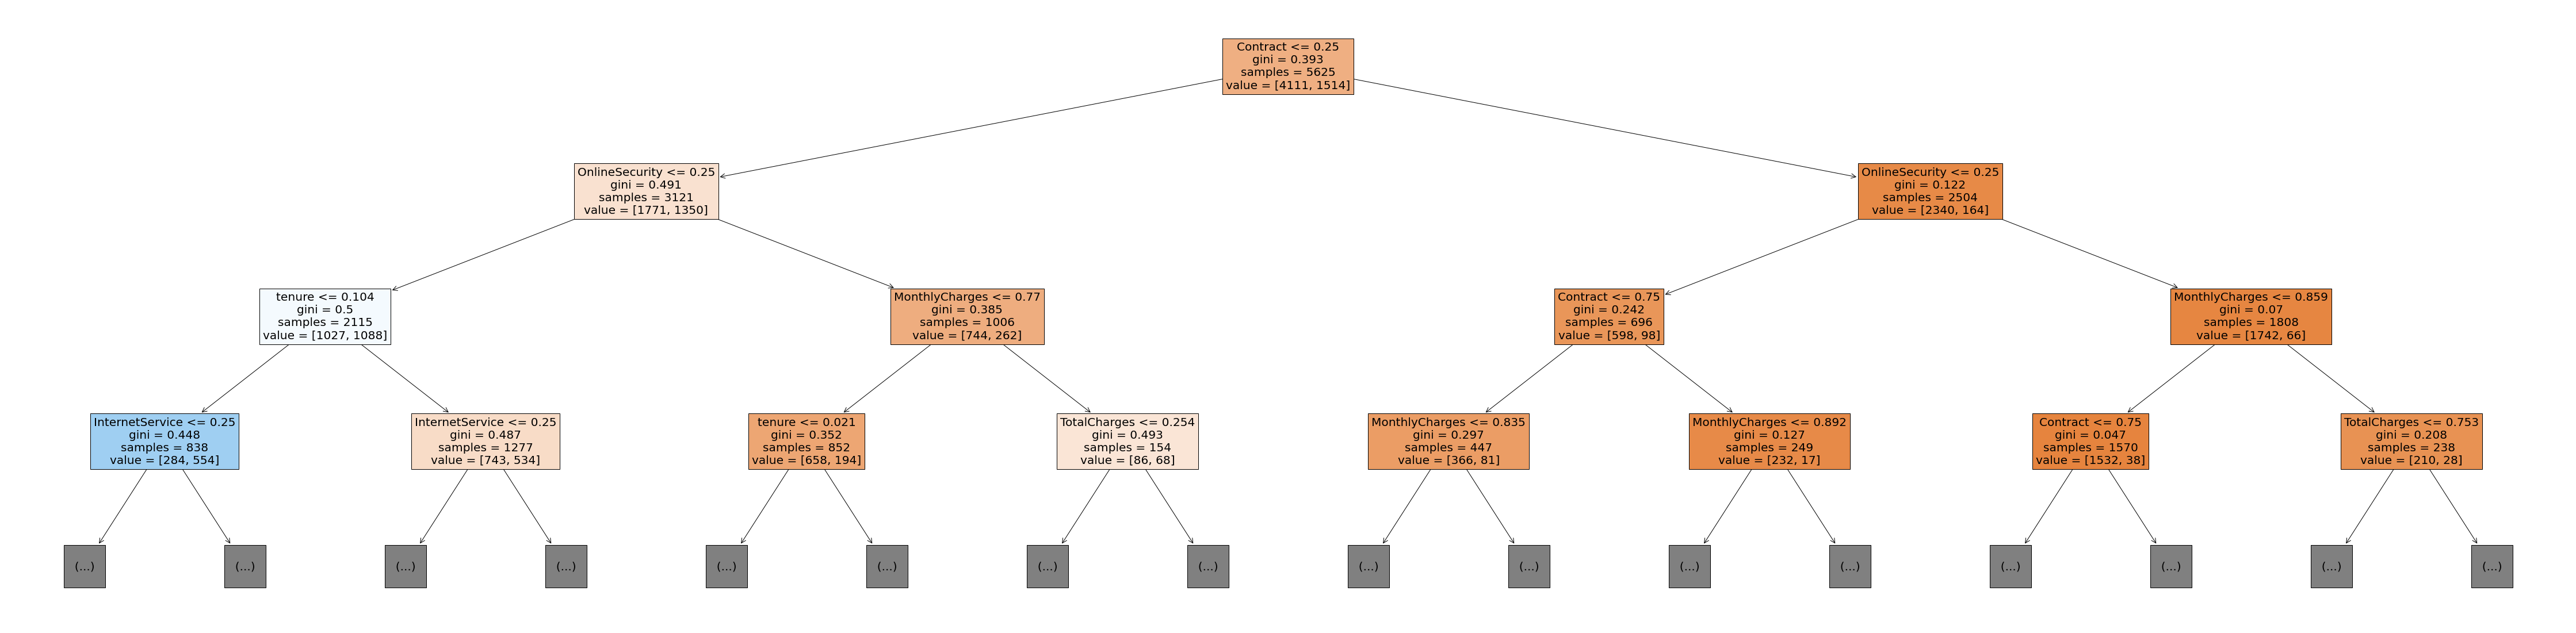

In [55]:
from sklearn.tree import plot_tree,export_text
plt.figure(figsize=(80,20))
plot_tree(de_tree_f,feature_names=Xf_train.columns,max_depth=3,filled=True);

In [56]:
de_tree_f.tree_.max_depth

26

In [58]:
de_tree_f.feature_importances_

array([0.02195125, 0.10652157, 0.01819619, 0.02861145, 0.04488785,
       0.01509128, 0.01154436, 0.01867144, 0.01269414, 0.0109435 ,
       0.17504637, 0.04017274, 0.19372203, 0.20978745, 0.02519118,
       0.02065918, 0.02010243, 0.00677759, 0.019428  ])

In [59]:
important_df = pd.DataFrame({'feature':Xf_train.columns,'importantance':de_tree_f.feature_importances_}).sort_values('importantance',ascending=False)

In [60]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(Xf_train,yf_train)
    train_acc = 1 - model.score(Xf_train, yf_train)
    val_acc = 1 - model.score(Xf_test, yf_test)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [61]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 26)])

In [62]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.269156,0.252310
1,2,0.258311,0.256574
2,3,0.221156,0.208955
3,4,0.216711,0.208955
4,5,0.199644,0.197584
5,6,0.192711,0.216773
6,7,0.176178,0.213220
7,8,0.161067,0.221748
8,9,0.144356,0.221038
9,10,0.128178,0.226013


In [63]:
# in above dataframe we noted that after depth size 5 the validation loss goes higher and training loss goes down which is over fitting the data
# Hence we can use depth size 5

In [64]:
from sklearn.tree import DecisionTreeClassifier
de_tree_f = DecisionTreeClassifier(max_depth=5, random_state=42)
de_tree_f.fit(Xf_train,yf_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [65]:
validation = de_tree_f.predict(Xf_test)
accuracy_score(yf_test,validation)

0.8024164889836531

In [66]:
# Accuracy is improved from  0.72423 to 0.80241 by fine tunning the parameter

In [68]:
# Random Forest classifier with fine tunning

In [69]:
random_tree = RandomForestClassifier(random_state=42)
random_tree.fit(Xf_train,yf_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [70]:
taget = random_tree.predict(Xf_test)

In [71]:
train_pred=random_tree.predict(Xf_train)
accuracy_score(train_pred,yf_train)

0.9984

In [72]:
# Accuracy for training data = 0.9984

In [73]:
accuracy_score(taget,yf_test)

0.7953091684434968

In [74]:
# Accuracy for Validation data = 0.7953
# checking for best max_depth

In [75]:
def max_depth_error(md):
    model = RandomForestClassifier(max_depth=md, random_state=42)
    model.fit(Xf_train,yf_train)
    train_acc = 1 - model.score(Xf_train, yf_train)
    val_acc = 1 - model.score(Xf_test, yf_test)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [76]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 26)])

In [77]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.269156,0.252310
1,2,0.236089,0.221038
2,3,0.207467,0.201848
3,4,0.201956,0.196162
4,5,0.196622,0.193319
5,6,0.186667,0.187633
6,7,0.174044,0.187633
7,8,0.158400,0.189765
8,9,0.135822,0.191187
9,10,0.108622,0.192608


In [78]:
random_tree = RandomForestClassifier(max_depth=6, random_state=42)
random_tree.fit(Xf_train,yf_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [79]:
taget = random_tree.predict(Xf_test)

In [80]:
train_pred=random_tree.predict(Xf_train)
accuracy_score(train_pred,yf_train)

0.8133333333333334

In [ ]:
# Accuracy in train dataset after tunning the parameter

In [81]:
accuracy_score(taget,yf_test)

0.8123667377398721

In [82]:
# Accuracy is improved from  0.72423 to 0.8123 by fine tunning the parameter